<font size=6><b>시총 Top5 지수화
* 기준일자 : 2008-01-02 ~ 2017-12-29
* KOSPI200/ S&P500

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action='ignore')
sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)



# Data Load

## KS200 API

In [4]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
ks200 = pdr.get_data_yahoo('^KS200', '2008-01-02', '2009-01-08')
ks200.shape

[*********************100%***********************]  1 of 1 completed


(252, 6)

In [5]:
ks200 = ks200[['Close']]
ks200.head()

,Close
Date,
2008-01-02,235.300003
2008-01-03,234.669998
2008-01-04,235.770004
2008-01-07,231.000000
2008-01-08,230.339996


In [6]:
ks200['지수200'] = (ks200['Close'] / ks200.iloc[0,0]) * 100
ks200.head()

,Close,지수200
Date,,
2008-01-02,235.300003,100.000000
2008-01-03,234.669998,99.732255
2008-01-04,235.770004,100.199746
2008-01-07,231.000000,98.172544
2008-01-08,230.339996,97.892050


## K5 excel

In [2]:
sample_df = pd.read_excel("./실습05_시가총액5_지수화.xlsx", sheet_name='일자별 시가총액', index_col=0)
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 1 to 252
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A전자     252 non-null    int64  
 1   B건설     252 non-null    int64  
 2   C증권     252 non-null    float64
 3   D화학     252 non-null    int64  
 4   E엔터     252 non-null    int64  
 5   합계      252 non-null    int64  
 6   지수      252 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 15.8 KB


In [15]:
sample_df.index = ks200.index
sample_df.head()

,A전자,B건설,C증권,D화학,E엔터,합계,지수
Date,,,,,,,
2008-01-02,75000000000,90000000000,4.920000e+11,88000000000,500000000000,1245000000000,100.000000
2008-01-03,72967500000,88150500000,4.916064e+11,90844160000,496788500000,1240357060000,99.627073
2008-01-04,74715000000,89676000000,4.784700e+11,93145360000,484134500000,1220140860000,98.003282
2008-01-07,74670000000,92502000000,4.853744e+11,91311440000,470178000000,1214035840000,97.512919
2008-01-08,74145000000,93942000000,4.906388e+11,90574000000,459004500000,1208304300000,97.052554


## 합치기

In [18]:
df = pd.concat([sample_df['지수'], ks200['지수200']], ignore_index=True, axis=1)
df.columns = ['지수5', '지수200']
df.head()

,지수5,지수200
Date,,
2008-01-02,100.000000,100.000000
2008-01-03,99.627073,99.732255
2008-01-04,98.003282,100.199746
2008-01-07,97.512919,98.172544
2008-01-08,97.052554,97.892050


<AxesSubplot: xlabel='Date'>

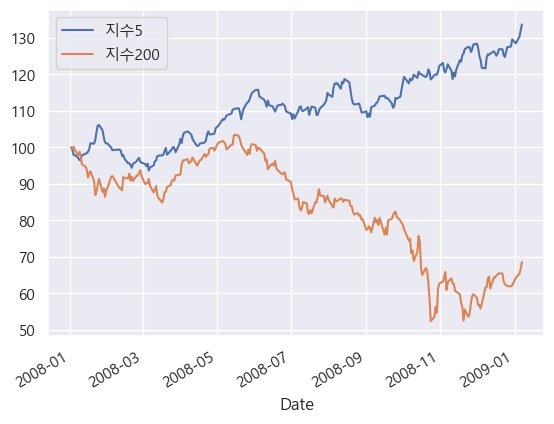

In [19]:
df.plot()
